# KONTEN

1. Deskripsi Project
2. Tujuan Project
3. Pengolahan Data

    3.1 Analisa Data Eksploratif
   
    3.2 Menguji Hipotesis 
    
    
4. Kesimpulan

# DESKRIPSI PROJECT
   project ini ditujukan untuk mengeathui perusahaan taxi apa saja yang beroperasi di 10 wilayah teratas yang dijadikan sebagai titik pengantaran di Chicago pada tanggal 15-16 November 2017 serta jumlah perjalannya. Selain itu project ini juga melibatkan pengujian hipotesis terhadap dampak dari cuaca terhadap perjalan taxi yang melakukan perjalanan dari Loop ke Bnadara Internasional O'Hare

# Tujuan Project 
1. mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran
2. membuat grafik: perusahaan taksi dan jumlah perjalanannya, 10 wilayah teratas berdasarkan jumlah pengantaran
3. Uji Hipotesa:
"Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu"

# Pengolahan Data

In [132]:
#Inisialisasi
import pandas as pd 
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from math import factorial
import seaborn as sns 


# Analisa Data Eksploratif

In [133]:
sql_1 = pd.read_csv('/datasets/project_sql_result_01.csv')

In [134]:
sql_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [135]:
sql_1.head().sort_values('trips_amount', ascending=False)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Berdasarkan info dataset SQL_1 dapat dilihat bahwa datasets mengandung 64 entries dengan 2 kolom. Tipe data untuk masing-masing kolom sudah benar

In [136]:
sql_1.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

Berdasarkan pencarian missing value, dapat dilihat bahwa datasets sql_1 tidak memiliki missing value.

Text(0, 0.5, 'Jumlah Perjalanan')

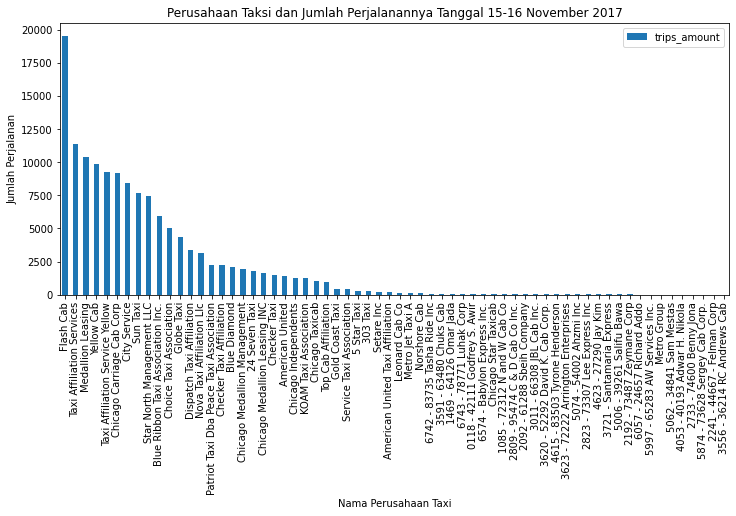

In [137]:
sql_1.plot(kind='bar', x='company_name', y='trips_amount', figsize=(12,5))
plt.title('Perusahaan Taksi dan Jumlah Perjalanannya Tanggal 15-16 November 2017')
plt.xlabel('Nama Perusahaan Taxi')
plt.ylabel('Jumlah Perjalanan')

Berdasarkan diagram bar dapat dilihat bahwa perusahaan taxi yang bernama Flash Cab memiliki jarak tempuh tertinggi yakni hampir mencapai 20ribu perjalanan. Jarak tempuh perusahaan Flash Cab sangat jauh dibandingkan dengan yang lainnya yakni hampir mencapai 2x kali lipat dari jarak tempuh perusahaan taxi lainnya.

In [138]:
sql_4 = pd.read_csv('/datasets/project_sql_result_04.csv')

In [139]:
sql_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [140]:
sql_4.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Berdasarkan info dataset SQL_4 dapat dilihat bahwa datasets mengandung 94 entries dengan 2 kolom. Tipe data untuk masing-masing kolom sudah benar. 

In [141]:
sql_4.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Berdasarkan pencarian missing value, dapat dilihat bahwa datasets sql_4 tidak memiliki missing value.

In [142]:
average_trips_sorts = sql_4.sort_values('average_trips', ascending=False).reset_index()
average_trips_sorts

,index,dropoff_location_name,average_trips
0,0,Loop,10727.466667
1,1,River North,9523.666667
2,2,Streeterville,6664.666667
3,3,West Loop,5163.666667
4,4,O'Hare,2546.900000
...,...,...,...
89,89,Mount Greenwood,3.137931
90,90,Hegewisch,3.117647
91,91,Burnside,2.333333
92,92,East Side,1.961538


In [143]:
top_ten_dropoff = average_trips_sorts.query('index <= 10')
top_ten_dropoff

,index,dropoff_location_name,average_trips
0,0,Loop,10727.466667
1,1,River North,9523.666667
2,2,Streeterville,6664.666667
3,3,West Loop,5163.666667
4,4,O'Hare,2546.900000
5,5,Lake View,2420.966667
6,6,Grant Park,2068.533333
7,7,Museum Campus,1510.000000
8,8,Gold Coast,1364.233333
9,9,Sheffield & DePaul,1259.766667


Text(0.5, 1.0, '10 Wilayah Dropoff Populer')

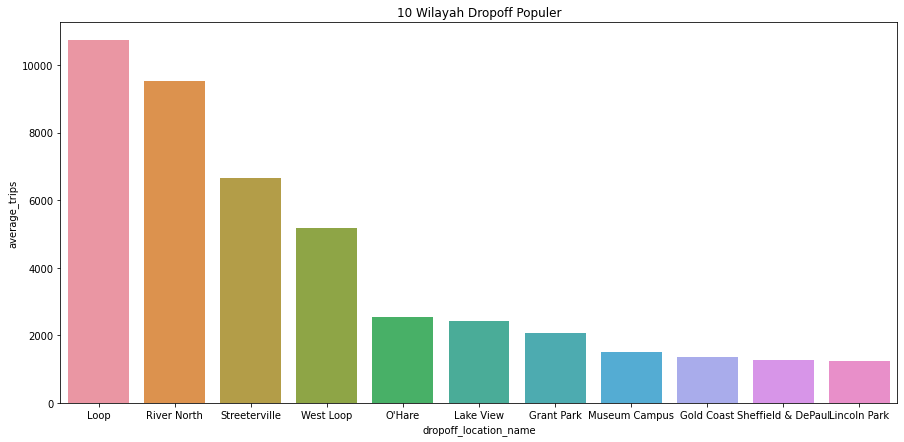

In [144]:
plt.figure(figsize=(15,7))
sns.barplot(data=top_ten_dropoff, y='average_trips', x='dropoff_location_name')
plt.title('10 Wilayah Dropoff Populer')

berdasarkan diagram batang diatas dapat dilihat bahwa 
1. Loop merupakan wilayah yang plaing sering menjadi destinasi dropoff location perusahaan taxi dengan total perjalanan lebih dari 10 ribu 
2. Lincoin park merupakan wilayah yang paling jarang menjadi lokasi dropoff perusahan taxi dengan total perjalanan kurang dari 2 ribu

Kesimpulan yang dapat diambil dari kedua grafik tersebut ialah 
1. Berdasarkan rekapan perjalanan taxi pada tanggal 15-16 November 2017 dapat diketahui bahwa perusahaan taxi Flash Cab merupakan perusahaan yang mendominasi perjalanan dengan total perjalanan mencapai 19558.
2. Secara keseluruhan, terdapat 9 nama perusahaan yang dipercaya tidak beroperasi karena total perjalanan dari masing-masing perusahaan taxi tersebut adalah 0 
3. Wilayah Loop merupakan lokasi dropoff yang paling banyak dituju dengan rata-rata perjalanan mencapai 10727.47 pada akhir November
4. Wilayah Lincoin Park merupakan lokasi dropoff yang paling jarang didatangi dengan rata-rata perjalan mencapai 1246.53 pada akhir November

# Menguji Hipotesa

In [145]:
sql_7 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [146]:
sql_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [147]:
sql_7.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [148]:
sql_7.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Berdasarkan informasi yang diperoleh dapat diketahui bahwa datasets sql_7 memiliki 1068 entires dengan 2 kolom. Datasets tidak memiliki missing value serta tipe data untuk kolom start_ts adalah salah. 
Tipe data start_ts harus diganti dengan time date

In [149]:
sql_7.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Text(0.5, 1.0, 'Sebaran Data Durasi SQL 7')

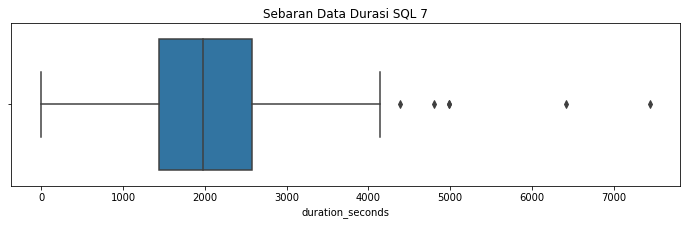

In [150]:
#mengetahui sebaran data dari duration seconds
plt.figure(figsize=(12,3))
sns.boxplot(x=sql_7["duration_seconds"])
plt.title('Sebaran Data Durasi SQL 7')

Berdasarkan hasil sebaran datases SQL 7 dapat ditemukan 
1. ditemukan nilai outlier 

Langkah yang akan dilakukan
1. mengetahui jumlah baris yang memiliki value diatas dari 4000 seconds
2. mengganti value dari baris tersebut dengan median atau mean datasets

In [151]:
#mencari baris yang memiliki nilai diatas nilai 4000 
#refence value = 4000
sql_7.loc[sql_7['duration_seconds'] > 4000]

,start_ts,weather_conditions,duration_seconds
79,2017-11-11 15:00:00,Good,4800.0
110,2017-11-18 13:00:00,Bad,4044.0
276,2017-11-18 12:00:00,Bad,4980.0
353,2017-11-25 18:00:00,Good,4140.0
354,2017-11-25 11:00:00,Good,7440.0
583,2017-11-11 16:00:00,Good,4980.0
619,2017-11-25 14:00:00,Good,6420.0
646,2017-11-11 13:00:00,Good,4380.0


In [152]:
percent_above_reference = 8 / 1068 
print(f'Persentase jumlah baris yang berada diatas nilai 4000 adalah {percent_above_reference:.0%}.')

Persentase jumlah baris yang berada diatas nilai 4000 adalah 1%.


Hasil ditemukan bahwa 1% dari total baris yang dimiliki datasets mengandung nilai yang berada diatas 4000. Karena hasil persentase kecil dari 10% maka nilai tersebut akan diganti dengan nilai mean dari datasets

In [153]:
mean_sql_7 = sql_7['duration_seconds'].mean()
mean_sql_7

2071.7312734082398

In [154]:
#mengganti semua nilai yang berada diatas 4000 dengan mean 
sql_7.loc[sql_7['duration_seconds'] > 4000, 'duration_seconds'] = 2071.731273

In [155]:
sql_7.describe()

,duration_seconds
count,1068.000000
mean,2048.688062
std,715.074731
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2574.250000
max,3982.000000


In [156]:
trips_bad = sql_7.query('weather_conditions=="Bad"')
trips_bad

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


In [157]:
trips_good = sql_7.query('weather_conditions=="Good"')
trips_good

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


#H0 = duration seconds perjalanan dari Loop ke Bandara antara Bad dan Good adalah berubah

#H1 = duration seconds perjalanan dari Loop ke Bandara antara Bad dan Good adalah sama

In [158]:
#mencari variance 
var_bad = np.var(trips_bad['duration_seconds'])
var_good = np.var(trips_good['duration_seconds'])
print('Variance perjalanan dalam kondisi Bad adalah:',var_bad) 
print('Variance perjalanan dalam kondisi Good adalah:',var_good)

Variance perjalanan dalam kondisi Bad adalah: 467345.8344922842
Variance perjalanan dalam kondisi Good adalah: 489567.7523690857


Berdasarkan hasil kalkulasi variance, dapat dilihat bahwa nilai variance tidak terlalu berbeda jauh, sehingga dalam project ini variance yang digunakan adalah True

In [159]:
alpha = 0.05
#menggunakan equal_var = true karena variance antar populasi mirip
weather_dur = st.stats.ttest_ind(trips_bad['duration_seconds'],trips_good['duration_seconds'],equal_var=True)
print('p-value: ', weather_dur.pvalue)
if (weather_dur.pvalue < alpha):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")

p-value:  2.54736756361704e-13
Kita menolak hipotesis nol


/tmp/ipykernel_27/2723821690.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  weather_dur = st.stats.ttest_ind(trips_bad['duration_seconds'],trips_good['duration_seconds'],equal_var=True)


Hipotesa yang diminta adalah apakah durasi rata-rata perjalan dari Loop ke Bandara adalah berubah ketika cuaca bagus dengan cuaca buruk. Berdasarkan hasil perbandingan antara p-value dengan alpha yang digunakan diketahui bahwa kita menolak H0 yang artinya durasi perjalanan dari Loop ke Bandara ketika cuaca bagus dan buruk adalah sama 